<a href="https://colab.research.google.com/github/saij1807/IT7103-Fall-2024/blob/main/Assignment2_pjalluri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

# Load data
df = pd.read_csv('/content/auto-mpg.csv')
print("Data Loaded. Here's the first 5 rows:")
print(df.head())

# Check column types and fix if necessary
print("\nColumn Data Types:")
print(df.dtypes)

# Fix 'horsepower' which may be read as object due to missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print("\nUpdated Column Data Types (if applicable):")
print(df.dtypes)


Data Loaded. Here's the first 5 rows:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  

Column Data Types:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object

In [55]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)
print("\nData split into training and testing sets:")
print(f"Training set size: {train_data.shape}")
print(f"Testing set size: {test_data.shape}")



Data split into training and testing sets:
Training set size: (298, 9)
Testing set size: (100, 9)



Displaying histograms for numeric columns:


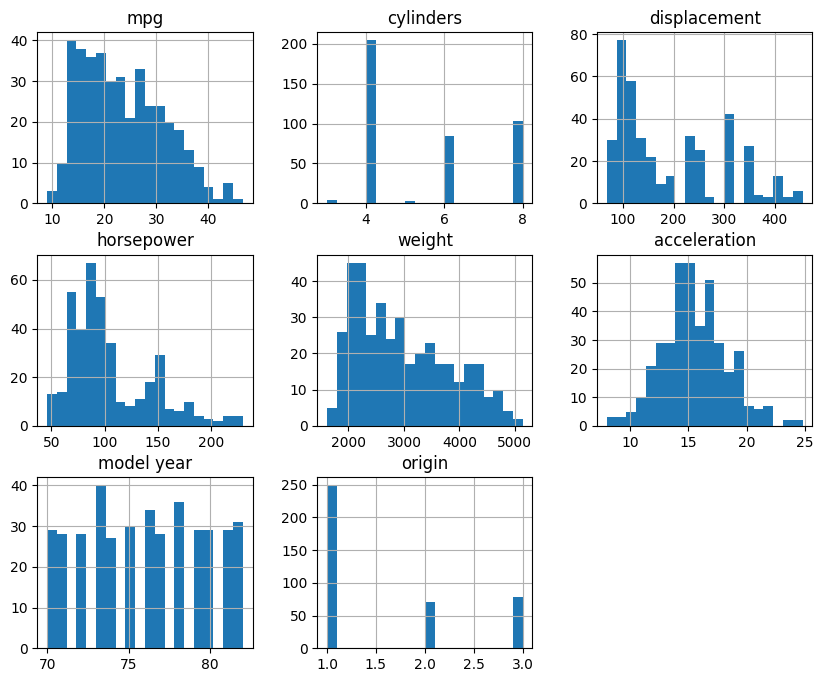


Symmetric columns: ['mpg', 'acceleration']
Skewed columns: ['displacement', 'horsepower', 'weight']
Categorical columns: ['origin']


In [56]:
import matplotlib.pyplot as plt

# Numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualize distribution of numeric columns
print("\nDisplaying histograms for numeric columns:")
df[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.show()

# Lists for symmetric, skewed, and categorical columns
symmetric_cols = ['mpg', 'acceleration']  # Example symmetric numeric columns
skewed_cols = ['displacement', 'horsepower', 'weight']  # Example skewed columns
categorical_cols = ['origin']  # Example categorical columns

print(f"\nSymmetric columns: {symmetric_cols}")
print(f"Skewed columns: {skewed_cols}")
print(f"Categorical columns: {categorical_cols}")


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# Pipeline for symmetric columns
symmetric_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

# Pipeline for skewed columns with log transformation
log_transformer = FunctionTransformer(np.log1p, validate=True)
skewed_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log_transform', log_transformer),
    ('scale', StandardScaler())
])

# Pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('one_hot', OneHotEncoder())
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('symmetric', symmetric_pipeline, symmetric_cols),
    ('skewed', skewed_pipeline, skewed_cols),
    ('categorical', categorical_pipeline, categorical_cols)
])

print("\nPipeline for preprocessing created.")



Pipeline for preprocessing created.


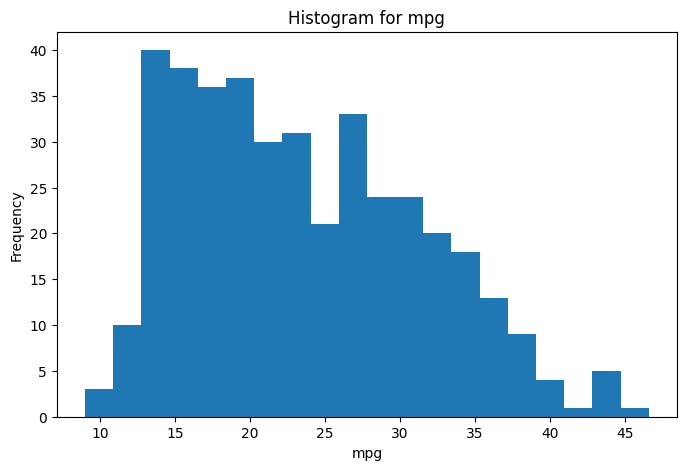

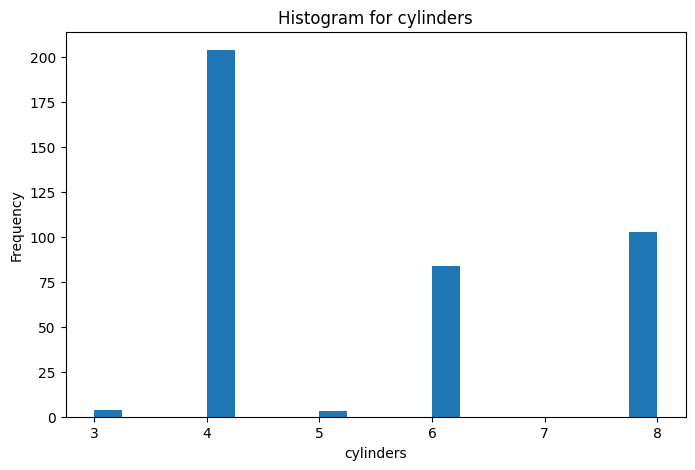

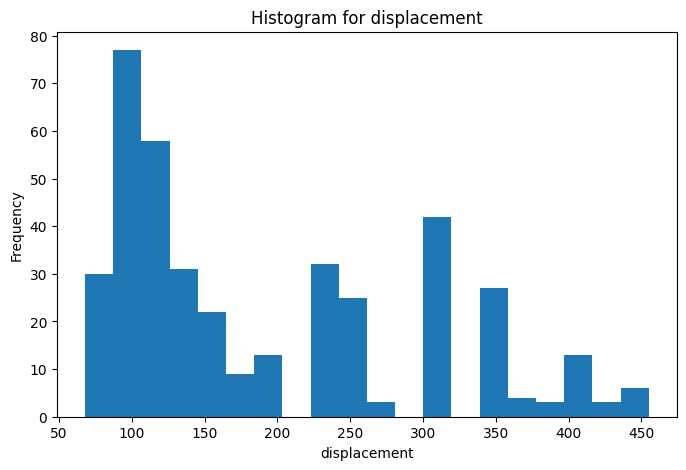

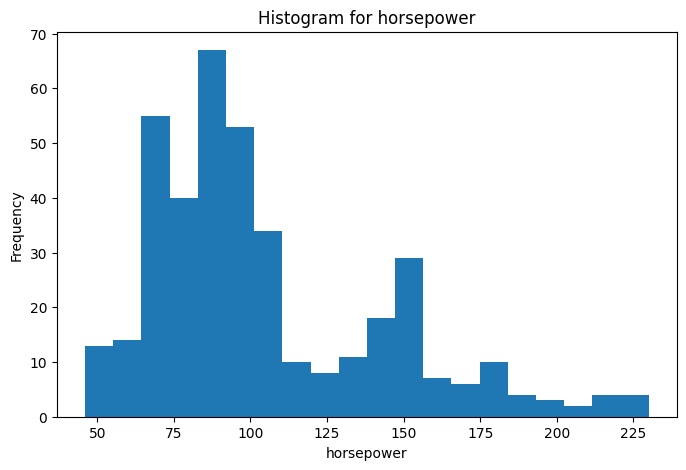

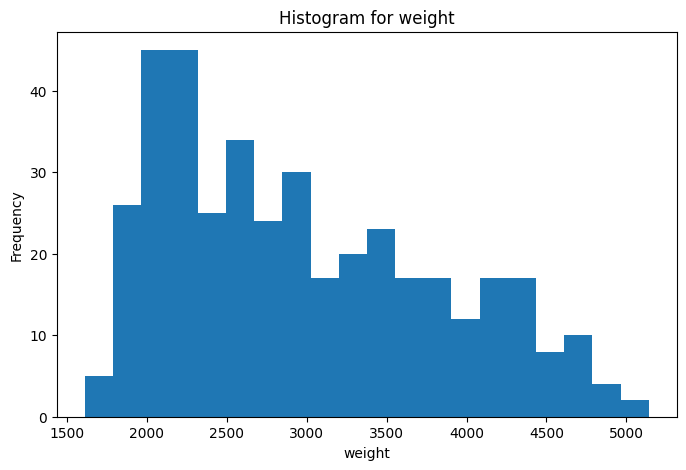

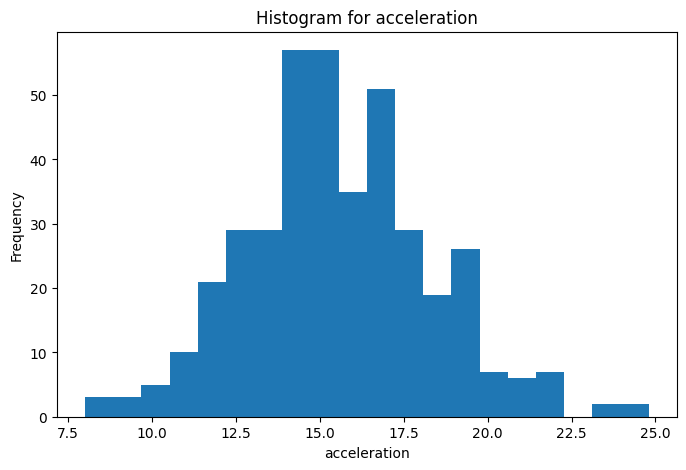

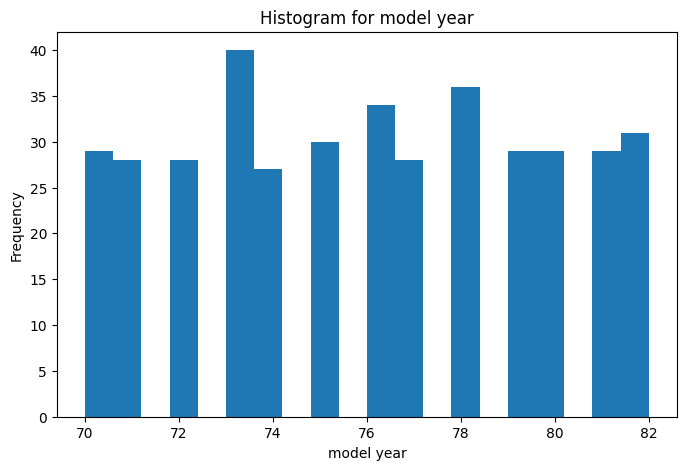

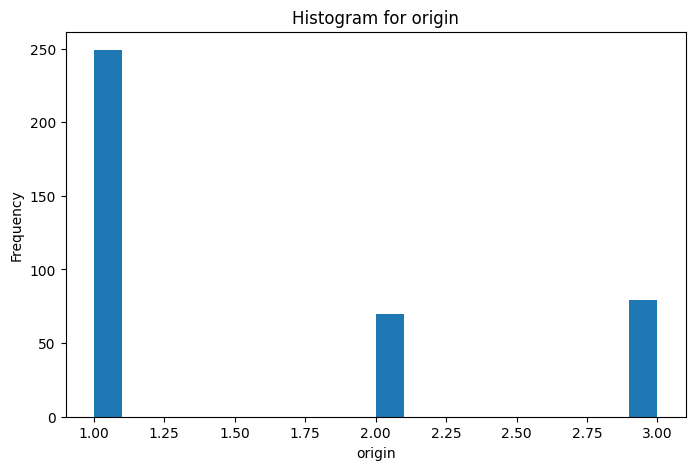

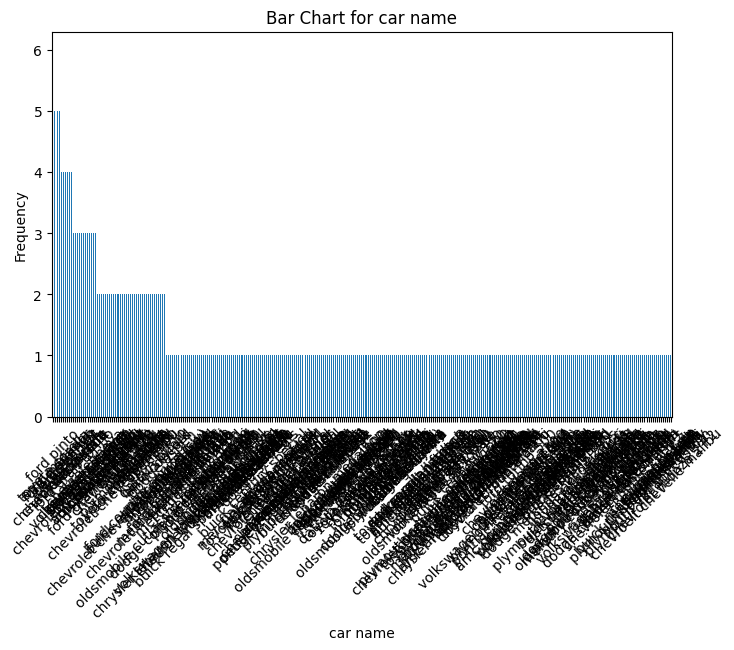

In [59]:
import matplotlib.pyplot as plt

# Draw bar charts for each column
for col in df.columns:
    if df[col].dtype == 'object':
        # For categorical columns, plot a bar chart for the frequency of unique values
        df[col].value_counts().plot(kind='bar', figsize=(8, 5))
        plt.title(f'Bar Chart for {col}')
        plt.ylabel('Frequency')
        plt.xlabel(col)
        plt.xticks(rotation=45)
    else:
        # For numeric columns, plot a histogram
        df[col].plot(kind='hist', bins=20, figsize=(8, 5))
        plt.title(f'Histogram for {col}')
        plt.ylabel('Frequency')
        plt.xlabel(col)

    plt.show()


In [60]:
# Fit the pipeline on the training data
preprocessor.fit(train_data)
print("\nPipeline fitted on the training data.")

# Transform both training and testing data
train_data_processed = preprocessor.transform(train_data)
test_data_processed = preprocessor.transform(test_data)
print("\nTraining and testing data transformed.")



Pipeline fitted on the training data.

Training and testing data transformed.


In [61]:
print(f'\nProcessed Training data shape: {train_data_processed.shape}')
print(f'Processed Testing data shape: {test_data_processed.shape}')



Processed Training data shape: (298, 8)
Processed Testing data shape: (100, 8)
